Here is the regular least squares fitting

In [36]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def const(x):
    return 1

def linear(x):
    return x

def quad(x):
    return x ** 2

def cubic(x):
    return x ** 3

def quartic(x):
    return x ** 4

def quintic(x):
    return x ** 5

def exp(x):
    return torch.exp(x)

def design_matrix(times, basis):
    mat = torch.Tensor([[func(time) for func in basis] for time in times])
    return mat

def ls_fit(xdata, ydata, psuedo_inv):
    return torch.sum(pseudo_inv * ydata, dim = 1)

def chi_sq(ydata, fit_params, design_mat, inv_cov_mat):
    return ydata.T @ inv_cov_mat @ ydata - fit_params.T @ design_mat.T @ inv_cov_mat @ design_mat @ fit_params

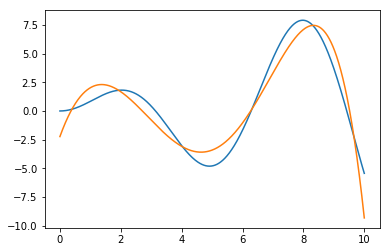

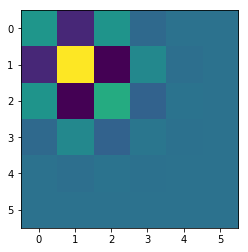

In [43]:
x_data = torch.linspace(0, 10, 1000)
y_data = x_data * torch.sin(x_data)

basis = [const, linear, quad, cubic, quartic, quintic]

cov_mat = torch.eye(1000)
inv_cov_mat = torch.inverse(cov_mat)

design_mat = design_matrix(x_data, basis)
pseudo_inv = torch.linalg.pinv(design_mat)

fit_params = ls_fit(x_data, y_data, pseudo_inv)

fit = torch.sum(design_mat * fit_params, dim=1)

plt.plot(x_data, y_data)
plt.plot(x_data, fit)

plt.show()

fit_params_cov_mat = pseudo_inv @ (cov_mat @ pseudo_inv.T)

plt.imshow(fit_params_cov_mat)
plt.show()

We can do better though, if we know the covariance matrix of our input data. We can take that into account when doing the least squares fitting.

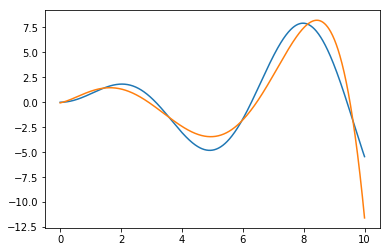

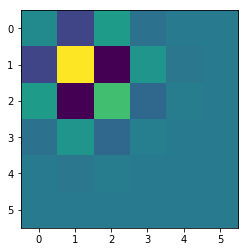

In [45]:
x_data = torch.linspace(0, 10, 1000)
y_data = x_data * torch.sin(x_data)

basis = [const, linear, quad, cubic, quartic, quintic]

cov_mat = torch.Tensor(scipy.linalg.hilbert(1000)) * torch.eye(1000)
inv_cov_mat = cov_mat

#cov_mat = torch.load("saved_tensors/cov_mat_background_0_1000.pt")
#inv_cov_mat = torch.load("saved_tensors/inv_cov_mat_background_0_1000.pt")

design_mat = design_matrix(x_data, basis)
pseudo_inv = torch.inverse(design_mat.T @ inv_cov_mat @ design_mat) @ design_mat.T @ inv_cov_mat

fit_params = ls_fit(x_data, y_data, pseudo_inv)

fit = torch.sum(design_mat * fit_params, dim=1)

plt.plot(x_data, y_data)
plt.plot(x_data, fit)

plt.show()

fit_params_cov_mat = pseudo_inv @ (cov_mat @ pseudo_inv.T)

plt.imshow(fit_params_cov_mat)
plt.show()

In [46]:
chi_sq(y_data, fit_params, design_mat, inv_cov_mat)

tensor(1.1457)

In [65]:
(2 ** 24) / 2000

8388.608

In [62]:
2000 * 125000000/(4194.304)

59604644.775390625